In this part we just import the necessary librarys.

In [ ]:
import findspark

In [ ]:
findspark.init("C:\\Users\\onurc\\Downloads\\spark-3.3.1-bin-hadoop3\\spark-3.3.1-bin-hadoop3\\spark-3.3.1-bin-hadoop3")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer,OneHotEncoder,VectorAssembler,StandardScaler
from pyspark.sql.functions import year, month, date_format, count
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.linalg import Vectors

In [ ]:
from pyspark.sql import SparkSession
#spark = SparkSession.builder.appName("Read CSV").config("spark.driver.memory", "8g").config("spark.executor.memory", "8g").getOrCreate()
spark = SparkSession.builder.appName("Read CSV").getOrCreate()
# Read the CSV file into a DataFrame
df = spark.read.csv("region25_en.csv", header=True, inferSchema=True)

## Visualization

In [ ]:
from pyspark.sql.functions import count
grouped_df = df.groupBy('location').agg(count('*').alias('count'))
grouped_df = grouped_df.withColumnRenamed('location', 'location_name')
grouped_df.show()

In this part we are preparing the data for visualisation

In [ ]:
import folium
import pandas as pd

In [ ]:
df_pd = grouped_df.toPandas()

In [ ]:
import sys
#assert sys.version_info >= (3, 10)

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

# Create empty latitude and longitude columns
df_pd['latitude'] = None
df_pd['longitude'] = None

 
for index, row in df_pd.iterrows():
    address=row['location_name']
    if address == "Chkalovskoe":
        df_pd['latitude'][index]= 55.5956
        df_pd['longitude'][index]= 37.4850
        continue
    if address == "Volno-Nadezhdinskoe":
        df_pd['latitude'][index]= 43.3747
        df_pd['longitude'][index]= 131.9956
        continue
    if address == "Pogranichnyj":
        df_pd['latitude'][index]= 44.6088
        df_pd['longitude'][index]= 131.4910
        continue
    if address == "Chuguevka":
        df_pd['latitude'][index]= 44.6088
        df_pd['longitude'][index]= 131.4910
        continue
    if address == "Gornorechenskij":
        df_pd['latitude'][index]= 51.776272
        df_pd['longitude'][index]= 55.099594
        continue
    if address == "Volchanets":
        df_pd['latitude'][index]= 42.9133
        df_pd['longitude'][index]= 132.7624
        continue
    if address == "Smoljaninovo":
        df_pd['latitude'][index]= 43.2809
        df_pd['longitude'][index]= 132.4595
        continue
    if address == "Lipovtsy":
        df_pd['latitude'][index]= 44.1997
        df_pd['longitude'][index]= 131.7229
        continue
    if address == "Novoshahtinskij":
        df_pd['latitude'][index]= 47.7569
        df_pd['longitude'][index]= 39.9358
        continue
    if address == "Slavjanka":
        df_pd['latitude'][index]= 42.8624
        df_pd['longitude'][index]= 131.3894
        continue
    if address == "Bolshoj Kamen":
        df_pd['latitude'][index]= 43.1125
        df_pd['longitude'][index]= 132.3452
        continue
    if address == "Jaroslavskij":
        df_pd['latitude'][index]= 55.8604
        df_pd['longitude'][index]= 37.6928
        continue
    if address == "Roschino":
        df_pd['latitude'][index]= 55.4575
        df_pd['longitude'][index]= 74.2358
        continue
        
#    match address:
#        case 'Chkalovskoe':
#            df_pd['latitude'][index]= 55.5956
#            df_pd['longitude'][index]= 37.4850
#            continue
#        case 'Volno-Nadezhdinskoe':
#            df_pd['latitude'][index]= 43.3747
#            df_pd['longitude'][index]= 131.9956
#            continue
#        case 'Pogranichnyj':
#            df_pd['latitude'][index]= 44.6088
#            df_pd['longitude'][index]= 131.4910
#            continue
#        case 'Chuguevka':
#            df_pd['latitude'][index]= 44.6088
#            df_pd['longitude'][index]= 131.4910
#            continue
#        case 'Gornorechenskij':
#            df_pd['latitude'][index]= 51.776272
#            df_pd['longitude'][index]= 55.099594
#            continue
#        case 'Volchanets':
#            df_pd['latitude'][index]= 42.9133
#            df_pd['longitude'][index]= 132.7624
#            continue
#        case 'Smoljaninovo':
#            df_pd['latitude'][index]= 43.2809
#            df_pd['longitude'][index]= 132.4595
#            continue
#        case 'Lipovtsy':
#            df_pd['latitude'][index]= 44.1997
#            df_pd['longitude'][index]= 131.7229
#            continue
#        case 'Novoshahtinskij':
#            df_pd['latitude'][index]= 47.7569
#            df_pd['longitude'][index]= 39.9358
#            continue
#        case 'Slavjanka':
#            df_pd['latitude'][index]= 42.8624
#            df_pd['longitude'][index]= 131.3894
#            continue
#        case 'Bolshoj Kamen':
#            df_pd['latitude'][index]= 43.1125
#            df_pd['longitude'][index]= 132.3452
#            continue
#        case 'Jaroslavskij':
#            df_pd['latitude'][index]= 55.8604
#            df_pd['longitude'][index]= 37.6928
#            continue
#        case 'Roschino':
#            df_pd['latitude'][index]= 55.4575
#            df_pd['longitude'][index]= 74.2358
#            continue

    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    if hasattr(location,'latitude') is not False:
        df_pd['latitude'][index]= location.latitude
        df_pd['longitude'][index]= location.longitude
        

    


In [ ]:
df_pd.dropna(subset=['latitude', 'longitude'], inplace=True)
df_pd

In the chart below, we can see the visualisation of the data in piecharts. <br> 
The data only shows the biggest 5 data in the column.

In [ ]:

df_pd_csv = pd.read_csv("region25_en.csv")

import matplotlib.pyplot as plt

# Get all the categorical columns in the DataFrame
#cat_cols = ["brand"]
#cat_cols = df_pd.select_dtypes(include=['object']).columns
cat_cols = ['brand', 'name', 'bodyType', 'color', 'fuelType',
       'transmission', 'power', 'price', 'vehicleConfiguration', 'engineName',
       'engineDisplacement', 'location']

# 'price', 'vehicleConfiguration', 'engineName',
#       'engineDisplacement', 'date', 'location', 'link', 'parse_date'


# Plot pie chart for each categorical column
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12,10))
i = 0
j = 0
for col in cat_cols:
    counts = df_pd_csv[col].value_counts()
    top_five = counts.head(5)
    print(top_five.keys())
    #count_values = top_five[col].value_counts().tolist()
    ax[i,j].pie(top_five, labels=top_five.keys() ,autopct='%.1f%%')
    ax[i,j].set_title(col)
    
#    ax1[i,j].bar( top_five.keys(),top_five)
#    ax1[i,j].set_title(col)
    if j<3:
        j += 1
        if j ==3 :
            j = 0
            i += 1
    fig.subplots_adjust(hspace=0.3)  # add horizontal space between subplots
#    fig1.subplots_adjust(hspace=0.5)  # add horizontal space between subplots
plt.title(col)
plt.show()


    

The charts below shows the top 5 data and their numbers in brand, name, bodytype, color, fueltype,trasmission,power,vehicleConfiguration,Enginename,Enginedisplacement and location. For example, from here we can see that Toyota is the most used car brand and the most used fueltype is gasoline. Making more assumptions from this chart and the chart above is possible.

In [ ]:
i = 0
j = 0
fig1, ax1 = plt.subplots(nrows=4, ncols=3, figsize=(12,10))
for col in cat_cols:
    if col == 'price':
        continue
    counts = df_pd_csv[col].value_counts()
    top_five = counts.head(5)
    ax1[i,j].bar( top_five.keys(),top_five)
    ax1[i,j].set_title(col)
    if j<3:
        j += 1
        if j ==3 :
            j = 0
            i += 1
    fig1.subplots_adjust(hspace=0.5)  # add horizontal space between subplots
plt.title(col)
plt.show()

The graph below shows the brand and price in boxplot. We can zoom in this graph and see the outlier data.

In [ ]:
import plotly.express as px
fig = px.box(df_pd_csv, x="brand", y="price")
fig.show()

The graph below shows the average price of the cars for each year. From here, we can see that the avg price of the cars increased every year. Also there was an huge increase between 1970 and 1980.

In [ ]:
grouped = df_pd_csv.groupby('year').mean()
fig = px.line(x=grouped['price'].keys(), y=grouped['price'],title='Average prices of cars for each year')
fig.show()

The graph below shows the comparasion of the price according to the body and fuel type of the cars. For example, we can see that jeep with 5 doors which is gasoline has the biggest prices.

In [ ]:
fig = px.scatter(df_pd_csv,x='bodyType', y='price',
                 color="fuelType", title='Comparasion of price according to the body type and fuel type of the cars')
fig.show()

City of announcement located in the map (Below) :

In [ ]:
m = folium.Map(location=[60, 100], zoom_start=4)

# Iterate over each row in the DataFrame and add a marker to the map
for index, row in df_pd.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10, # adjust radius based on count column
        popup=row['location_name'],
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# Show the map
#m.save("map1.html")
display(m)

## Preprocessing 

In [ ]:
df.printSchema()

Null values were handled here. <br> String column were most the repeated ones. The int columns were filled with avg.

In [ ]:
from pyspark.sql.functions import count,mean
column_names = df.columns
for column_name in column_names:
    null_count = df.filter(df[column_name].isNull()).groupBy().agg(count("*")).first()[0]
    if null_count > 0:
        print(f"Column '{column_name}' has {null_count} null values")

In [ ]:
for column_name, dtype in df.dtypes:
    if dtype in ['int', 'double']:
        avg = df.agg(mean(column_name)).first()[0]
        print(f"Average value of {column_name}: {avg}")
    elif dtype == 'string':
        most_frequent = df.groupBy(column_name).agg(count("*").alias("count")).sort("count", ascending=False).first()[0]
        print(f"Most frequent value of {column_name}: {most_frequent}")

In [ ]:
values = {'color': 'white', 'fuelType': 'Gasoline', 'year':2010,'mileage':134250,
         'transmission':'CVT','power':145}

for column_name, value in values.items():
    df = df.na.fill({column_name: value})
    
df = df.drop("vehicleConfiguration", "engineName","engineDisplacement")

In this part, string column were one hot encoded

In [ ]:
string_columns = [column[0] for column in df.dtypes if column[1] == "string"]

#string_columns = ... # list of string column names

from pyspark.ml.feature import StringIndexer,OneHotEncoder
from pyspark.ml import Pipeline


# Loop through the string columns and apply one-hot encoding
stages = []

# Loop through the string columns and apply string indexing and one-hot encoding
for column_name in string_columns:
    string_indexer = StringIndexer(inputCol=column_name, outputCol=f"{column_name}_indexed")
    one_hot_encoder = OneHotEncoder(inputCol=f"{column_name}_indexed", outputCol=f"{column_name}_vector")
    stages += [string_indexer, one_hot_encoder]

# Apply the pipeline of string indexing and one-hot encoding to the data
pipeline = Pipeline(stages=stages)
df1 = pipeline.fit(df).transform(df)

In this part, we seperates the dates as year, month , day (3 different column). 

In [ ]:
from pyspark.sql.functions import year, month, date_format

df1 = df1.withColumn("year", year(df["parse_date"]))
df1 = df1.withColumn("month", month(df["parse_date"]))
df1 = df1.withColumn("day", date_format(df["parse_date"], 'dd').cast('integer'))

In this part, unnecessary columns and one hot encoded columns were dropped.

In [ ]:
df1 = df1.drop("brand", "name","bodyType","color","fuelType","transmission","location","link","date","parse_date")

In [ ]:
input_features = df1.columns
input_features.remove('price')
featureassembler = VectorAssembler(inputCols = input_features, outputCol = "Independent Features")

In [ ]:
output = featureassembler.transform(df1)
#output.select("Independent Features").show()

In [ ]:
finalised_data = output.select("Independent Features", "price")
finalised_data.show()

Train, test split :

In [ ]:
train_data, test_data = finalised_data.randomSplit([0.75, 0.25])

## Model

In [ ]:
regressor = LinearRegression(featuresCol = 'Independent Features', labelCol = 'price')
regressor = regressor.fit(train_data)

## Results

In this part, we can see the result and how the prediction is close the actual price.

In [ ]:
pred_results = regressor.evaluate(test_data)
pred_results.predictions.show()

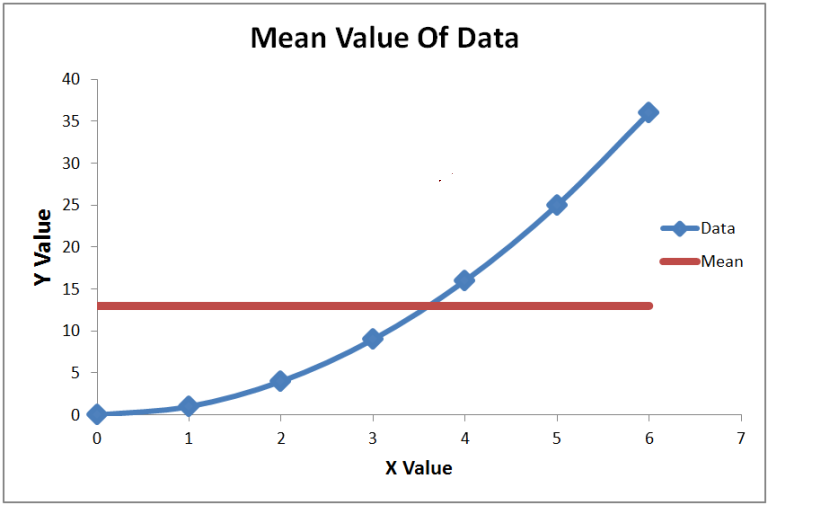 <br> In this part, we evaluated according to the r2 score ( the picture above was added as an example to r2 ). We can see that our result is close to 1.

In [ ]:
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")
r2_score = evaluator.evaluate(pred_results.predictions)
print(r2_score)